# Dataset link : https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df =pd .read_csv('Customer churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


form the above out come the blank spaces in tenure and datatype has to be converted to float 

# Converting blanks (tenure is 0) and the TotalCharges becomes 0.converting datatype object to float

In [96]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")


# Verifing the changes

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# checking for null values

In [98]:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [99]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# checking for duplicates using primary key

In [100]:
df["customerID"].duplicated().sum()

0

# converting 1 to Yes and 0 to NO in SeniorCitizen for better understanding

In [101]:
def conv(value):
    if value == 1 :
        return "Yes"
    else :
        return "No"
df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)

In [102]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Number of customers churn.

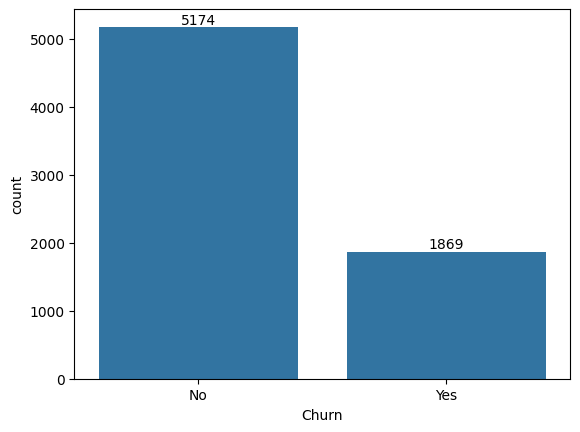

In [103]:
ax = sns.countplot(x = 'Churn',data =df)
ax.bar_label(ax.containers[0])
plt.show()

# percentage of customers churn.

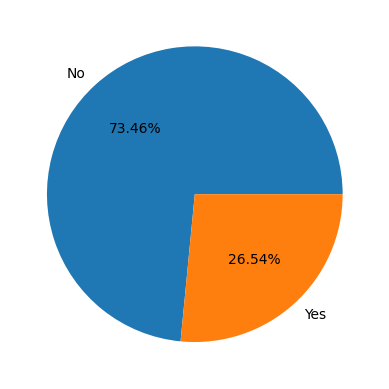

In [104]:
gb = df.groupby("Churn").agg({'Churn' : "count"})
plt.pie(gb['Churn'],labels = gb.index, autopct="%1.2f%%")
plt.show()

# Let's explore the reson behind it 
# Checking for gender wise churn 
 

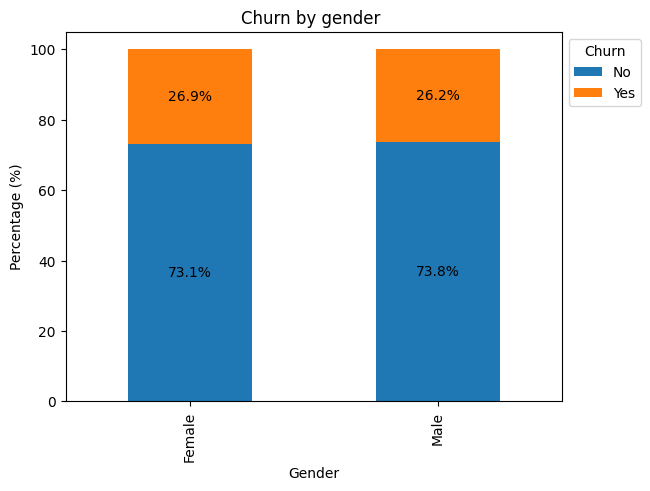

In [105]:

percent_df = pd.crosstab(df['gender'], df['Churn'], normalize='index') * 100

ax=percent_df.plot(kind='bar', stacked=True)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')
plt.title('Churn by gender ')
plt.ylabel('Percentage (%)')
plt.xlabel('Gender')
plt.legend(title='Churn', bbox_to_anchor=(1, 1))

plt.show()

from above graph no such differnce recognized.

# Checking for SeniorCitizen wise churn

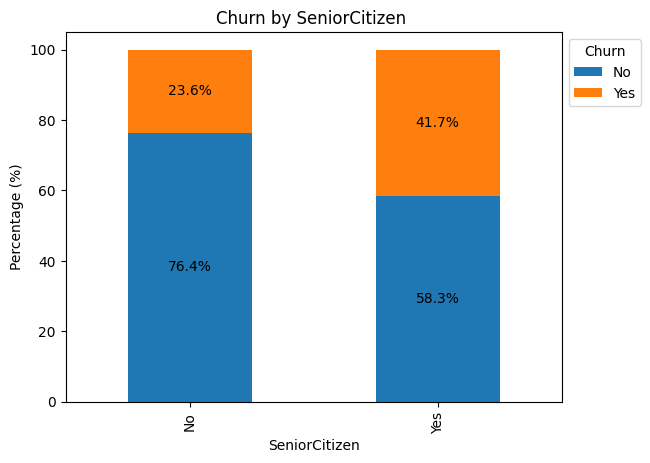

In [106]:

percent_df = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100

ax=percent_df.plot(kind='bar', stacked=True)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')
plt.title('Churn by SeniorCitizen ')
plt.ylabel('Percentage (%)')
plt.xlabel('SeniorCitizen')
plt.legend(title='Churn', bbox_to_anchor=(1, 1))

plt.show()

from above graph nearly half of the seniorcitizens category are churned .

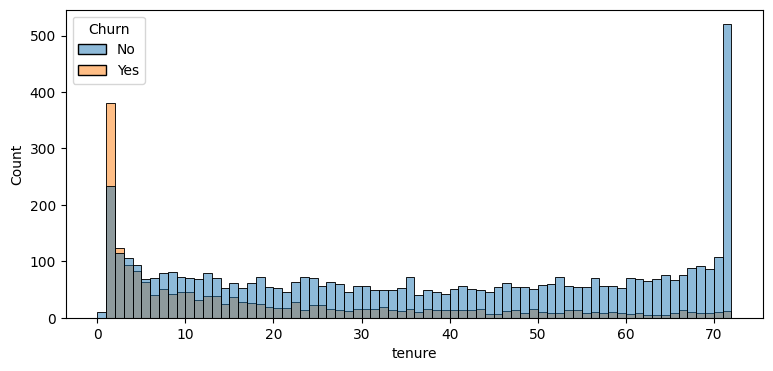

In [108]:
plt.figure(figsize=(9,4))
sns.histplot(x='tenure',data=df,bins=72,hue='Churn')
plt.show()

from the above graph.customes who as used our services are stayed in and customers on initial months (1-4
) have churned 

# let check for the service contract of customers

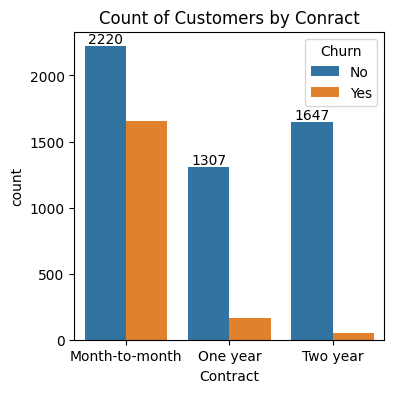

In [110]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="Contract",data=df,hue='Churn')
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Conract")
plt.show()

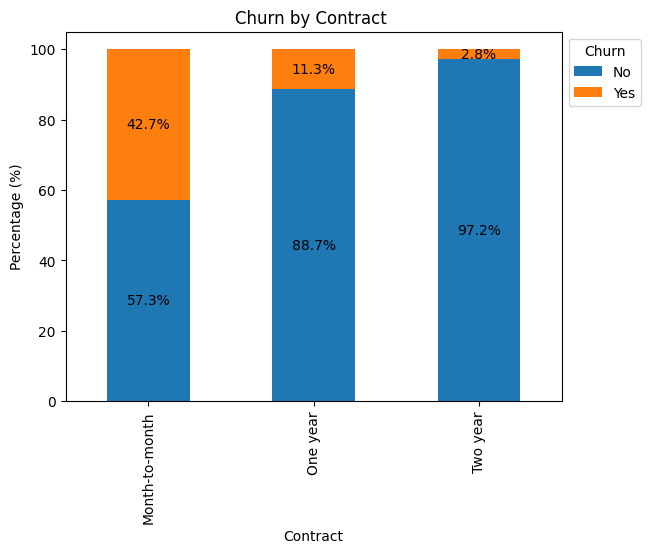

In [111]:
percent_df = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100

ax=percent_df.plot(kind='bar', stacked=True)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')
plt.title('Churn by Contract ')
plt.ylabel('Percentage (%)')
plt.xlabel('Contract')
plt.legend(title='Churn', bbox_to_anchor=(1, 1))

plt.show()

from above graph .Customer who have momth to month contract are likely to churn from those who have 1-2 years of contract

In [112]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

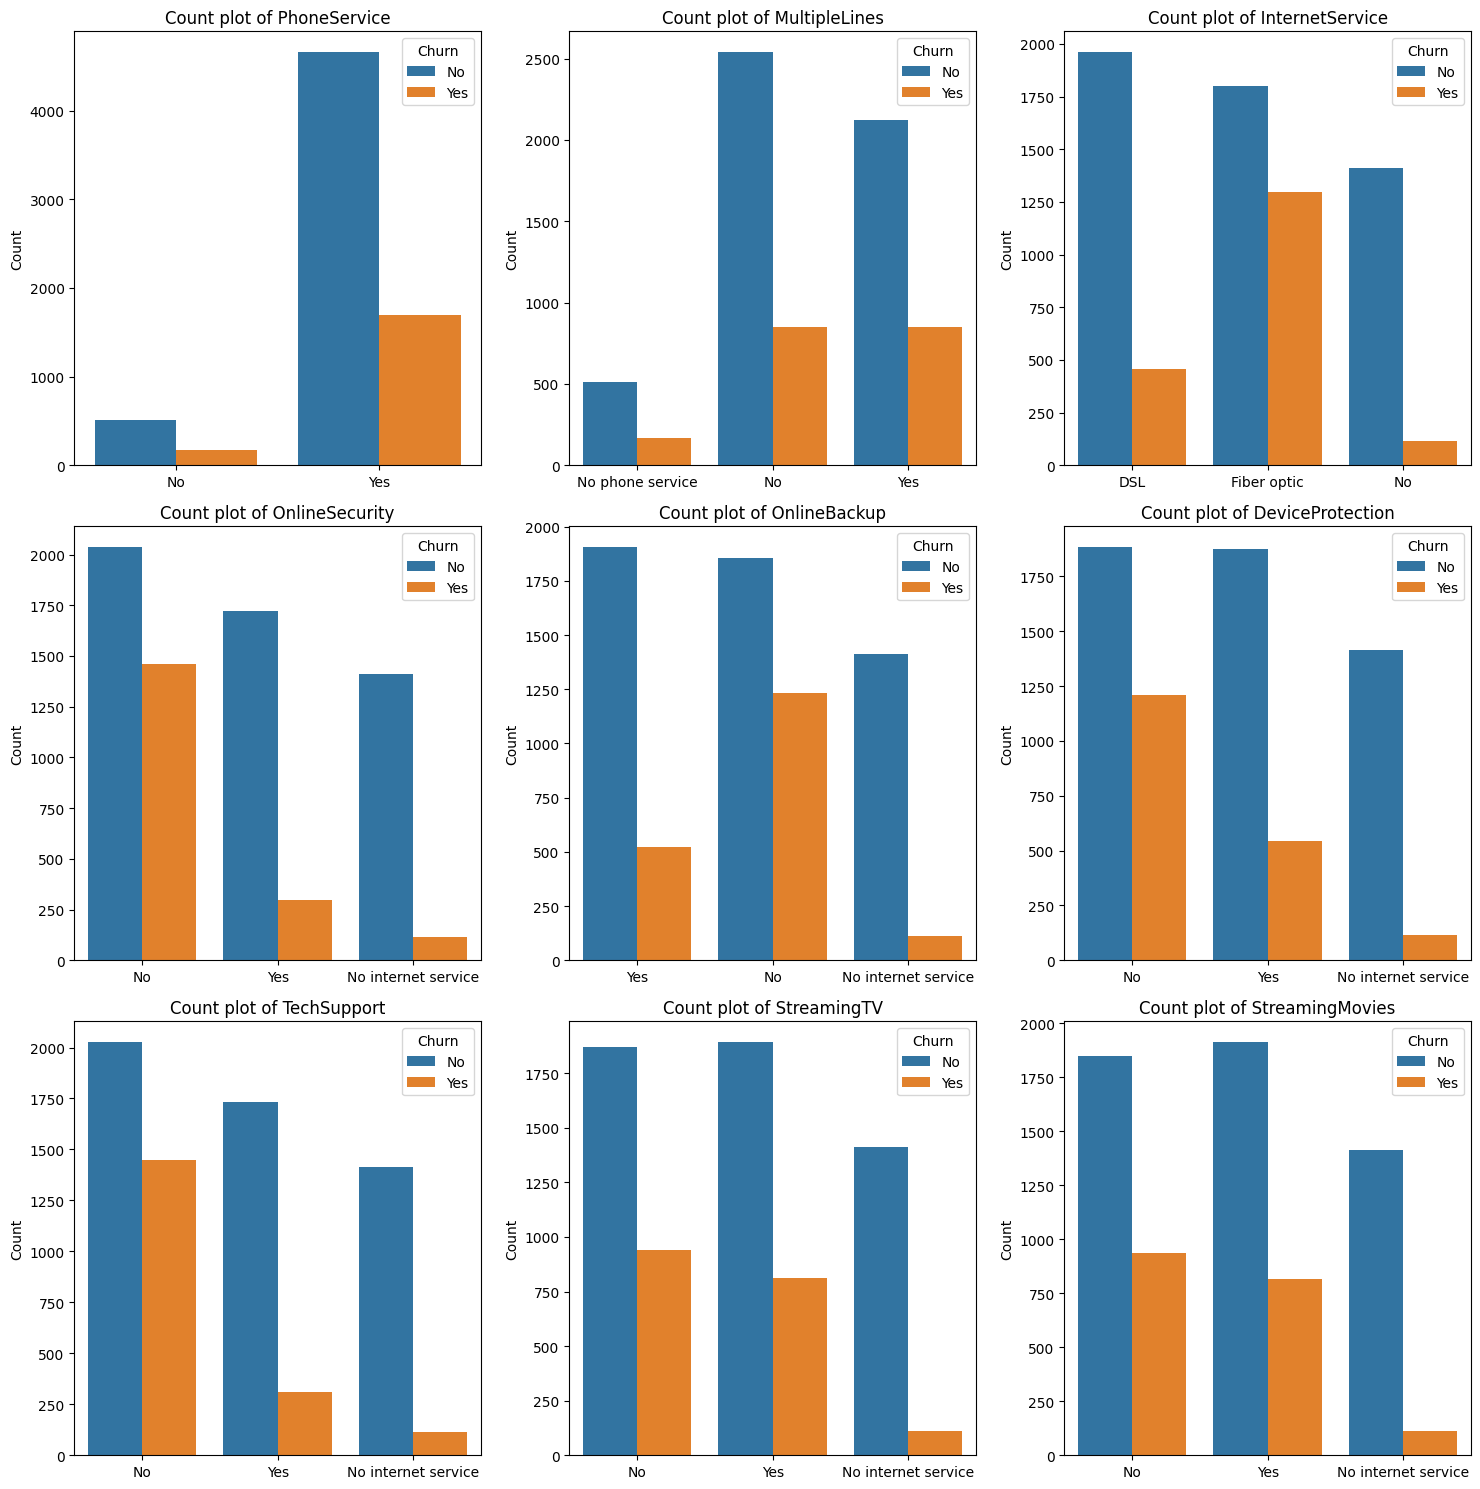

In [114]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
           'StreamingMovies']

# Set up the subplot grid (3 rows and 3 columns for 9 plots)
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten axes for easy iteration
axes = axes.flatten()

# Create a count plot for each column
for i, column in enumerate(columns):
    sns.countplot(x=column, data=df, ax=axes[i],hue='Churn')
    axes[i].set_title(f'Count plot of {column}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

from the graphs.Customers with services like OnlineSecurity, TechSupport, and DeviceProtection tend to churn less compared to those without them. Fiber optic internet users show higher churn rates than DSL or no service.

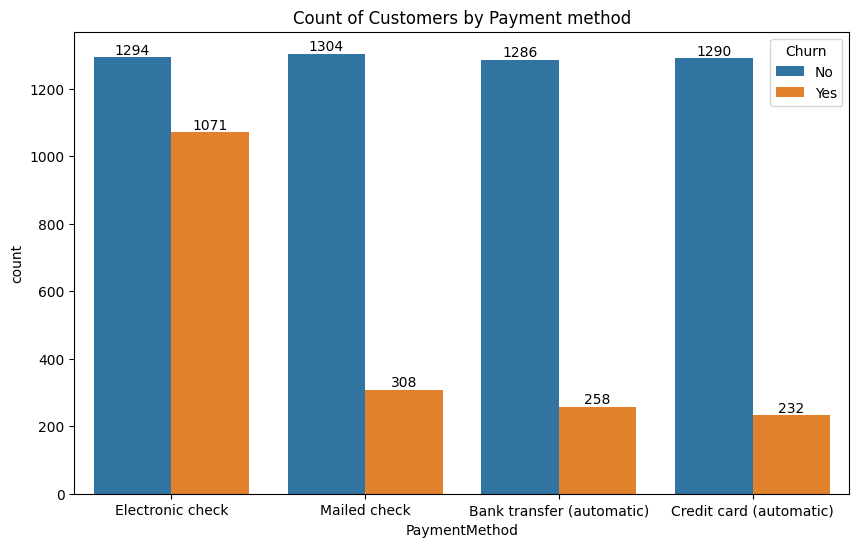

In [122]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x="PaymentMethod",data=df,hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Customers by Payment method")
plt.show()

Customer who is using electroinc check are more likely to churn